In [421]:
import numpy as np

np.random.seed(42)
rand = np.random.randint(0, 5000, size=5000)
x1 = np.column_stack((rand, rand))
y1 = (x1[:, 0] != x1[:, 1]).astype(int)

In [422]:
x2 = np.random.randint(0, 5000, size=(5000, 2))
y2 = (x2[:, 0] != x2[:, 1]).astype(int)

In [423]:
x = np.vstack((x1, x2))
y = np.hstack((y1, y2))

In [424]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = MLPClassifier(hidden_layer_sizes=(5, 4), activation='relu', solver='lbfgs', random_state=42)

In [425]:
clf.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 4), random_state=42, solver='lbfgs')

In [426]:
clf.predict([[33, 21]])

array([1])

In [427]:
clf.score(x_test, y_test)

0.979

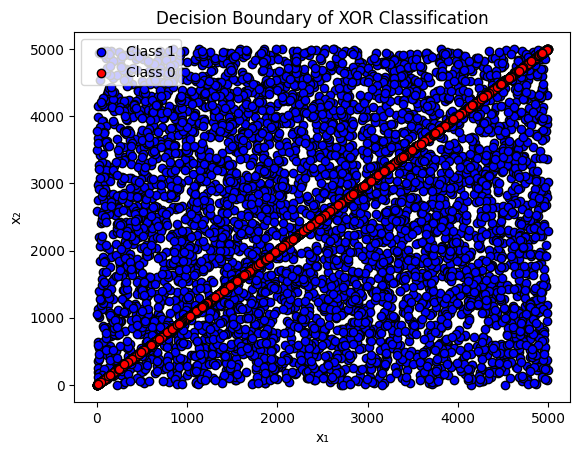

In [429]:
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid_points = np.c_[xx.ravel(), yy.ravel()]
z = clf.predict(grid_points)
z = z.reshape(xx.shape)
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='blue', edgecolor='k', label='Class 1')
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='red', edgecolor='k', label='Class 0')
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title('Decision Boundary of XOR Classification')
plt.legend()
plt.show()